# Exemplo: APLICAÇÃO DE REGRESSÃO LOGÍSTICA

**Instituição:** Universidade de Brasília

**Disciplina:** FGA0083 - Aprendizado de Máquina 1

**Professor:** Dr. Sergio Antônio Andrade de Freitas

---

## 1. INTRODUÇÃO

Este notebook demonstra um fluxo de trabalho completo para um problema de classificação binária utilizando o algoritmo de Regressão Logística. O processo abrange desde o carregamento dos dados até a preparação, treinamento do modelo, avaliação de performance e visualização dos resultados. O objetivo é fornecer um exemplo didático e reprodutível de aplicação do modelo.

---

## 2. METODOLOGIA

A implementação do modelo segue as etapas canônicas de um projeto de aprendizado de máquina.

### 2.1. Importação das bibliotecas

As bibliotecas necessárias para manipulação de dados (`pandas`), modelagem (`scikit-learn`) e visualização (`matplotlib`) são importadas.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


### 2.2. Carregamento e preparação dos dados

Os dados são carregados a partir de um arquivo CSV. Em seguida, são separados em variáveis preditoras (`X`), que correspondem às *features* do modelo, e a variável alvo (`y`), que representa a classe a ser predita.

In [2]:
# Carregamento do conjunto de dados
# O arquivo deve estar no caminho especificado.
caminho_dados = '../data/8.0 - dados_logistic_regression.csv'
dados = pd.read_csv(caminho_dados)

# Separação das variáveis preditoras (features) e da variável alvo (target)
X = dados[['Feature1', 'Feature2']].values
y = dados['Target'].values

print("Dados carregados e preparados.")

Dados carregados e preparados.


### 2.3. Segmentação em conjuntos de treino e teste

O conjunto de dados é dividido em dois subconjuntos: um para treinamento do modelo e outro para teste de sua performance. Esta etapa é fundamental para avaliar a capacidade de generalização do modelo em dados não vistos. Utiliza-se uma proporção de 80% para treino e 20% para teste.

In [3]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensões do conjunto de treino: {X_train.shape}")
print(f"Dimensões do conjunto de teste: {X_test.shape}")

Dimensões do conjunto de treino: (80, 2)
Dimensões do conjunto de teste: (20, 2)


### 2.4. Treinamento do modelo de regressão logística

Um objeto do tipo `LogisticRegression` é instanciado e, em seguida, treinado com os dados do conjunto de treino (`X_train`, `y_train`) por meio do método `.fit()`.

In [4]:
# Instanciação e treinamento do modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso.")

Modelo treinado com sucesso.


## 3. RESULTADOS E AVALIAÇÃO

Com o modelo treinado, são realizadas predições sobre o conjunto de teste. A performance é quantificada por meio do relatório de classificação, que inclui métricas de precisão e revocação, e da matriz de confusão.

In [5]:
# Realização de predições com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação da performance do modelo
print("RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred))

print("\nMATRIZ DE CONFUSÃO:")
print(confusion_matrix(y_test, y_pred))

RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.50      0.67         6

    accuracy                           0.85        20
   macro avg       0.91      0.75      0.78        20
weighted avg       0.88      0.85      0.83        20


MATRIZ DE CONFUSÃO:
[[14  0]
 [ 3  3]]


### 3.1. Visualização gráfica dos resultados

Para uma análise qualitativa, os resultados da classificação no conjunto de teste são visualizados em um gráfico de dispersão. A cor de cada ponto representa a classe predita pelo modelo, permitindo uma inspeção visual da fronteira de decisão aprendida.

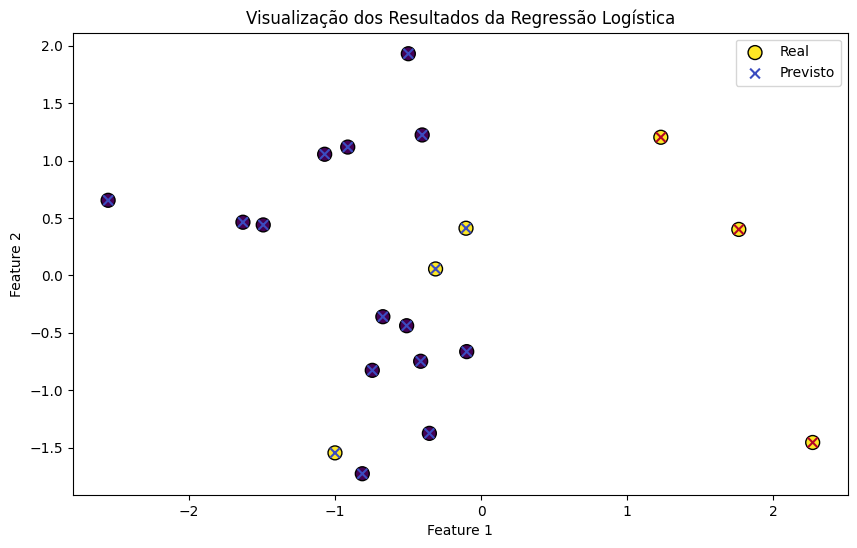

In [6]:
# Criação do gráfico de dispersão para visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k', s=100, label='Real')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=50, label='Previsto')

plt.title('Visualização dos Resultados da Regressão Logística')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()